In [82]:

import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score, accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/johnle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


turning all uppercase to lower


In [2]:
creat_sentance = WordNetLemmatizer()

In [3]:
def fix_word(comment):
    
   # nword = re.sub(r"@\S+", " ", comment)  
    nword = re.sub(r"[^a-zA-Z]", " ", comment)  
    nword = nword.lower() 
    nword = nword.split()
    final_word = [i for i in nword if i not in stopwords.words('english')]
    final_sentence = [creat_sentance.lemmatize(z) for z in final_word]
    final_sentence = ' '.join(final_sentence)
    return final_sentence

In [4]:
dataset = pd.read_csv('first-gop-debate.csv')

dataset = shuffle(dataset)
dataset.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
7036,7037,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,It's just hilarious watching the usual #GOP sh...,NaN,8/7/2015 8:11,6.296710e+17,Canada,Eastern Time (US & Canada)
6558,6559,Ben Carson,1.0000,yes,1.0000,Negative,1.0000,Religion,0.6395,NaN,...,NaN,230,NaN,NaN,RT @cenkuygur: Does Ben Carson also want to fo...,NaN,8/7/2015 8:18,6.296730e+17,NaN,NaN
8526,8527,Donald Trump,0.4311,yes,0.6566,Neutral,0.6566,None of the above,0.4311,NaN,...,NaN,72,NaN,NaN,"RT @larryelder: Trump should have said, ""Megyn...",NaN,8/7/2015 0:16,6.295520e+17,NaN,Pacific Time (US & Canada)
1035,1036,No candidate mentioned,0.4398,yes,0.6632,Neutral,0.6632,FOX News or Moderators,0.4398,NaN,...,NaN,0,NaN,NaN,"Fox News clearly have a hair, dress and comple...",NaN,8/7/2015 9:45,6.296950e+17,Berks/London,NaN
11057,11058,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,FOX News or Moderators,1.0000,NaN,...,NaN,132,NaN,NaN,RT @RWSurferGirl: Is it just me or does anyone...,NaN,8/6/2015 19:43,6.294830e+17,Montana,NaN


In [37]:
x = dataset.text.apply(fix_word)
y = dataset['sentiment']
print(x)

7036     hilarious watching usual gop shill trying unde...
6558     rt cenkuygur ben carson also want follow god l...
8526     rt larryelder trump said megyn ask nine candid...
1035     fox news clearly hair dress complexion code pr...
11057    rt rwsurfergirl anyone else want punch chris w...
                               ...                        
5716     marco rubio told face candidate yesterday anti...
2864     ivankatrump call father comment rosie supposed...
12551    rt supermanhotmale scott walker business iran ...
10214    rt wilberforce one favorite thing gopdebates m...
13066    glad social security debated gopdebates future...
Name: text, Length: 13871, dtype: object


In [36]:
#Data Processing
vectorizer=CountVectorizer() #Encode as integers to be used for the algorithm
x_vectorized=vectorizer.fit_transform(x) #Learn the vocabulary dictionary and return document-term matrix.

In [7]:
#Split between train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_vectorized, y, test_size=0.3, random_state=0)


In [80]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=25, criterion='gini')
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
gs_dt = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
gs_dt.fit(x_train, y_train)
prediction1=gs_dt.predict(x_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [76]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(x_train, y_train)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
gs_lr=GridSearchCV(lr, params, n_jobs=1, cv=5)
gs_lr.fit(x_train, y_train)
prediction2=gs_lr.predict(x_test)

In [31]:
#Multi-layer perceptron Classifier
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(x_train, y_train)
prediction3=NN.predict(x_test);

/Users/johnle/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'Decision Tree - Accuracy Score: 0.662')

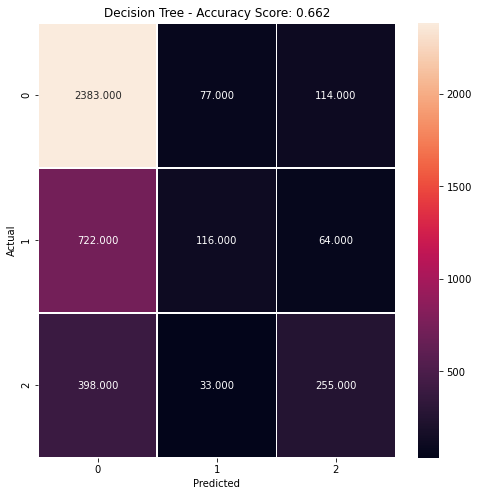

In [69]:
#Measure performance using Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm1=metrics.confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Decision Tree - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction1)
plt.title(title, size=12)


Text(0.5, 1.0, 'Logistic Regression - Accuracy Score: 0.690')

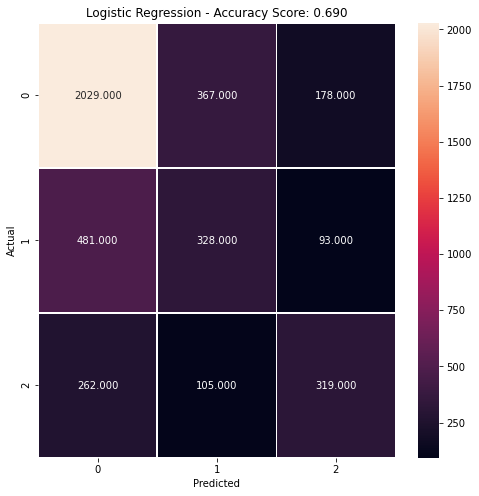

In [49]:
cm2=metrics.confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Logistic Regression - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction2)
plt.title(title, size=12)


Text(0.5, 1.0, 'Neural Network - Accuracy Score: 0.628')

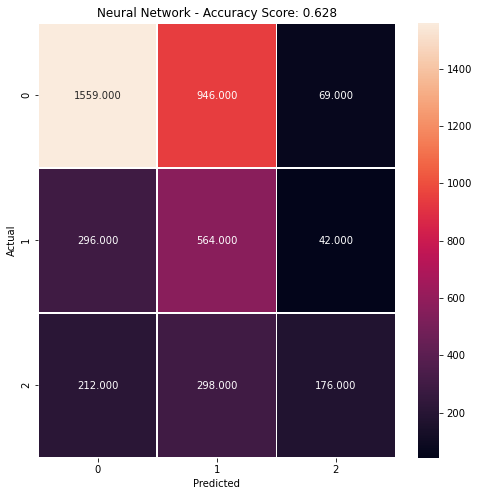

In [32]:
cm3=metrics.confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8,8))
sns.heatmap(cm2, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Neural Network - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction3)
plt.title(title, size=12)